# Analysis of the effect of starting locations on angular error in HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
colorblind_palette = ['#2d004b', '#5ab4ac', '#b2182b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [4]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/analysis/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [5]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,building_center_z,building_center_x,avatar_presence,...,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles,absolute_180_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,True,...,193.285812,77.811048,93.207763,77.811048,93.207763,15.396716,15.396716,15.0,15.0,15.396716
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,True,...,213.233536,91.855810,85.818077,91.855810,85.818077,-6.037733,353.962267,-6.0,354.0,6.037733
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,True,...,-0.259201,-179.866720,-173.521430,180.133280,186.478570,6.345290,6.345290,6.0,6.0,6.345290
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,True,...,-0.275711,-179.858270,-176.230517,180.141730,183.769483,3.627752,3.627752,4.0,4.0,3.627752
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,True,...,-143.234238,-142.000152,-161.115388,217.999848,198.884612,-19.115237,340.884763,-19.0,341.0,19.115237


## Linear Mixed Effects Models

In [7]:
lmer_df = df_cleaned[['absolute_180_angles', 'RT', 'subject_id', 'starting_loc_id', 'avatar_id', 'distance_to_target']]
lmer_df.head()

,absolute_180_angles,RT,subject_id,starting_loc_id,avatar_id,distance_to_target
0,15.396716,25.825715,365,44,46,197.743621
1,6.037733,4.799789,365,36,46,213.345438
2,6.345290,4.638590,365,30,46,111.427967
3,3.627752,2.361455,365,30,46,111.458707
4,19.115237,5.975304,365,19,46,232.651757


### Predicting `angular error` based on `starting location`

In [52]:
formula = 'np.log(absolute_180_angles) ~ C(starting_loc_id, Treatment(reference=27))'

model_LM = smf.mixedlm(formula = formula, data = lmer_df, groups=lmer_df['subject_id']).fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       np.log(absolute_180_angles)
No. Observations:        7708          Method:                   REML                       
No. Groups:              23            Scale:                    1.7064                     
Min. group size:         329           Log-Likelihood:           -13067.5123                
Max. group size:         336           Converged:                Yes                        
Mean group size:         335.1                                                              
--------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                          3.580    0.118 30.384 0.000  3.349  3.811
C(sta

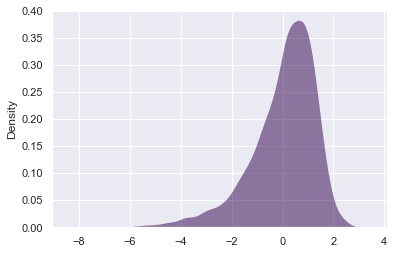

In [53]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()

### Predicting `angular error` based on `starting location` and `distance to target`

In [54]:
formula = 'np.log(absolute_180_angles) ~ C(starting_loc_id, Treatment(reference=27)) + distance_to_target'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = lmer_df, groups=lmer_df['subject_id']).fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       np.log(absolute_180_angles)
No. Observations:        7708          Method:                   REML                       
No. Groups:              23            Scale:                    1.7065                     
Min. group size:         329           Log-Likelihood:           -13075.3181                
Max. group size:         336           Converged:                Yes                        
Mean group size:         335.1                                                              
--------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                          3.558    0.121 29.472 0.000  3.321  3.795
C(sta

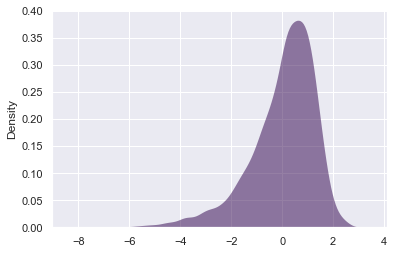

In [55]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()

### Predicting `angular error` based on `distance to target`

In [56]:
formula = 'np.log(absolute_180_angles) ~ distance_to_target'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = lmer_df, groups=lmer_df['subject_id']).fit()
print(model_LM.summary())

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(absolute_180_angles)
No. Observations: 7708    Method:             REML                       
No. Groups:       23      Scale:              1.7466                     
Min. group size:  329     Log-Likelihood:     -13135.9430                
Max. group size:  336     Converged:          Yes                        
Mean group size:  335.1                                                  
---------------------------------------------------------------------------
                       Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept               3.324      0.094   35.342   0.000    3.140    3.509
distance_to_target     -0.000      0.000   -2.302   0.021   -0.000   -0.000
Group Var               0.176      0.041                                   



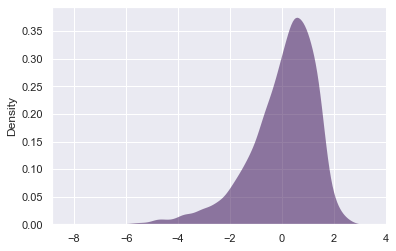

In [57]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()